# Criticality and Cascades

#### Table of Contents:
1. Up-down states in the cerebral cortex
2. Critical cascade in a (neural) network
3. The equilibrium parameter

#### Learning Goals
1. Understand what criticality is and how it arises.
2. Know where criticality appears in nature and how it might applied.

Gedenkt door andere teams:
- Wat zijn up/down states
- Wat is de biological function (in slaap)
- Simuleren met potential spikes
- Modeleren met neuronen en kijken naar spikes

In [2]:
import sys; sys.path.append('..') # Needed for import

from utils.simulate import RecurrentNeuralNetwork

import matplotlib.pyplot as plt
import numpy as np

# Understanding Criticality
Criticality in our brain refers to a state in which your brain operates near a <u>phase transition</u> point between <u>order</u> and <u>chaos</u>.  
To get a better understanding of this definition will we explain each of the components using a model that we intuitivly understand more.  
This model is the Ising model.

## The Ising model
The Ising model consits of magnetic dipole moments of atomic "spins" that can be in two states, an up spin (+1) or a down spin (-1).  
Each magnetic dipole moment is located on a grid or lattice like in the figure below. Now lets take a closer look at this specific state.   
Each spin is influenced by its neighbors. So in this state the dipole moment in the circle has an up spin while all its neighbors have a down spin.  
This causes the dipole moment in the circle to flip from an up state to a down state like you can see in the figure below.  

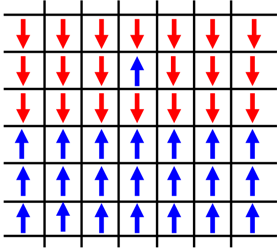 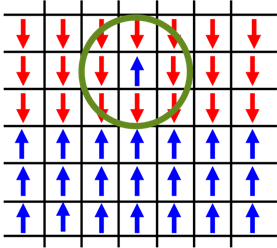 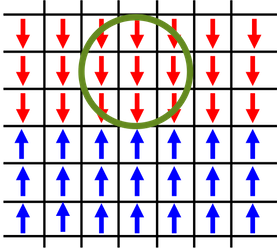

Each individual spin ($\sigma_i$) has a chance to flip or change it spin direction. The rate of change of spin direction is given by the Boltzmann distribution like so:  
$$
P(\sigma_i) \propto e^{-\frac{E}{k_bT}}
$$
Where $P(\sigma_i)$ represent the probability of a specific spin configuration ($\sigma_i$) to change from spin., E is the energy of the configuration, $k_b$ is the Boltzmann constant, and T is the temperature.  
As you can see when the temperature(T) increases the exponent becomes smaller, indicating a higher probability for spin flips to occur. You can see this relationship happening of you run the code for the plot below.


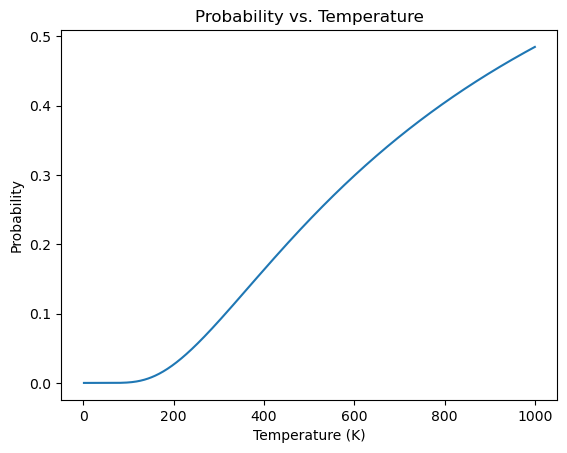

In [30]:
def plot_probability_spin_configuration():
    kb = 1.38e-23
    E = 1e-20
    # Temperature in kelvin
    T = np.linspace(1, 1000, 1000)
    P = np.exp(-E/(kb * T))

    plt.plot(T,P)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Probability")
    plt.title("Probability vs. Temperature")
    plt.show()

plot_probability_spin_configuration()


As we raise the system's temperature, the likelihood of spin flips occurring becomes higher. When the temperature reaches a sufficiently high level, it becomes less likely for all spins to align consistently. This phenomenon leads to a transition, as depicted in the images below. As you look from left to right, the temperature increases, and in the final image, you can observe the absence of any discernible structure.

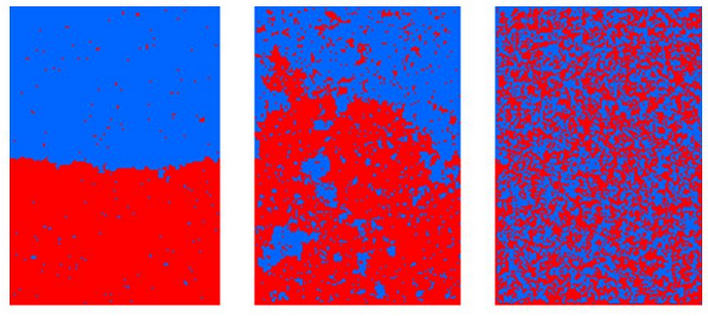

A <u>phase transition</u> has occured, and you can clearly see which one of the states represent the <u>order</u> state and the <u>chaos</u> state.  
Now to find this point of criticality for our model or the critical temperature, we need to use some parameter to find this critical temperature.  
When magnetic dipole moments are aligned will this result in a strong overall magnetic field. When we lose this alignment we lose our magnetic field.  
Thus we can use magnetism ($M$) to find this critical temperature. The magnetization ($M$) can be expressed as follows:  
$$M = \frac{1}{N} \sum_i \langle\sigma_i\rangle$$  
Where N is the the total number of atoms, and $\sigma_i$ represents the spin at site $i$. The $\langle\rangle$ denote that we take the average of the spin sites.  
Below you can see how such a magnetism curve would looke like with increasing temperature.  
As you can see there is a steep transition from having magnetism to not having magnetism. When looking at phase transitions and you are trying to find this transition point you try to compare two parameters with each other.  
These are then called the order parameter and control parameter. In the Ising model the order parameter is magnetism and the control parameter is the temperature.

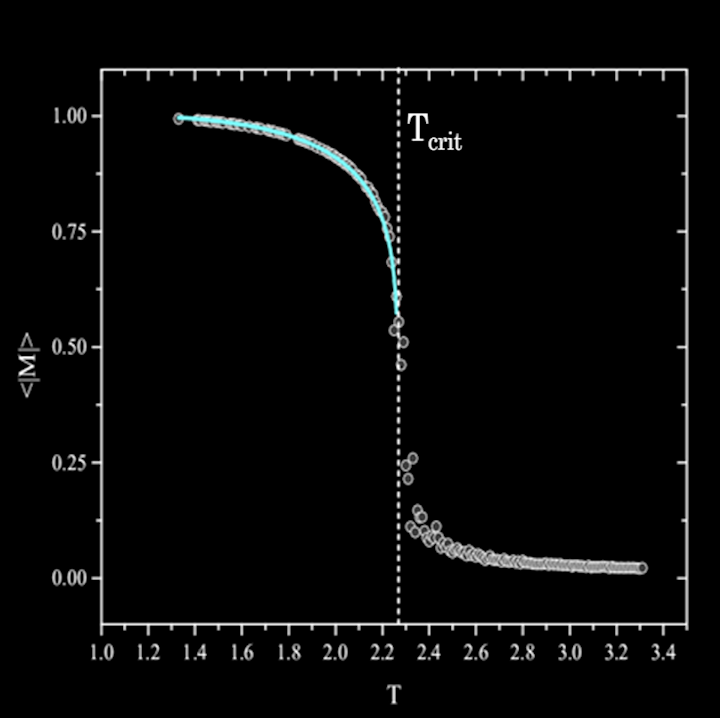 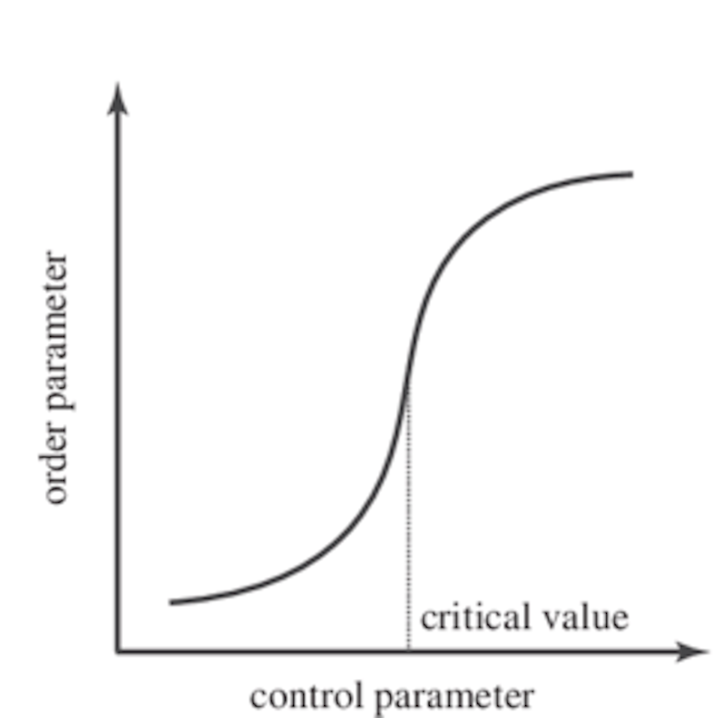

What the order and control parameters are in your brain is not really clear. We know that there are two different phases (up and down states), but how do we find criticallity then?

## The power law

Another way to find the criticality or critical point is to look at a power law relation.  
A power law is a mathematical relationship between two quantities, where a relative change in one quantity results in a relative change in the other quantity proportional to a power of the change.  
In other words, when one variable increases or decreases, the other variable responds in a manner determined by  an exponent or power.   
An easy example is the area of a square. If you were to double the length of its sides then the area will multiply by a factor of four.  This results in a power law of 2 between the variable length and area of a square.
$$
Area_{square} = L^2 \quad \text{when} \quad L \rightarrow 2L \quad \text{then} \quad (2L)^2 = 4L^2 = 4 \cdot Area_{square}
$$
Below you can run the code to see that there is a power law relation when the log-log plot of the variables is linear.

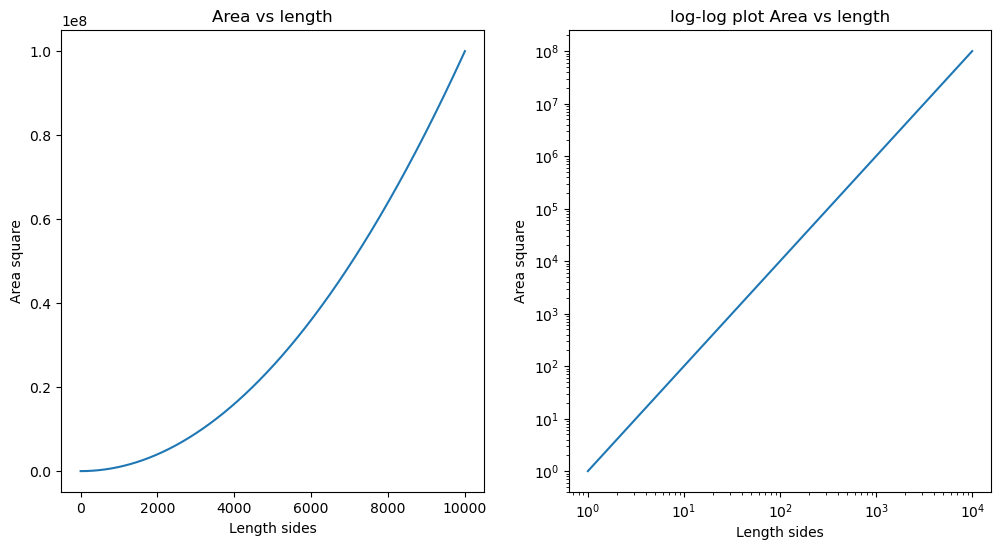

In [14]:
def plot_area_length():
    L = np.linspace(1,10000,1000)
    A = L**2



    fig, ax = plt.subplots(1,2, figsize = (12,6))
    ax[0].plot(L,A)
    ax[1].loglog(L,A)
    ax[0].set(xlabel='Length sides', ylabel='Area square')
    ax[1].set(xlabel='Length sides', ylabel='Area square')
    ax[0].set_title("Area vs length")
    ax[1].set_title("log-log plot Area vs length")


plot_area_length()

In the Ising model if you plot the correlation lenght between two spins vs the temperature then you can find the power law.  
The correlation length between two spins represents the distance over which the flipping of one spin is correlated with the flipping of another spin.  
This correlation is shown in the first figure below.  
As you can see if the temperature is lower than the critical temperature is the correlation lenght low. However as we come closer to the critical temperature does the correlation length peak. Beyond the critical temperature does the correlation length decrease again.  
If we plot the correlation of all these spins against the distance and create a log-log plot, we observe a linear relationship, as demonstrated in the second figure below. 
This linear relationship only counts when we take $T$ to be the critical temperature.
You can see that this is true in the third figure below, as the lower temperature or higher temeprature don't have an exponential relationship.

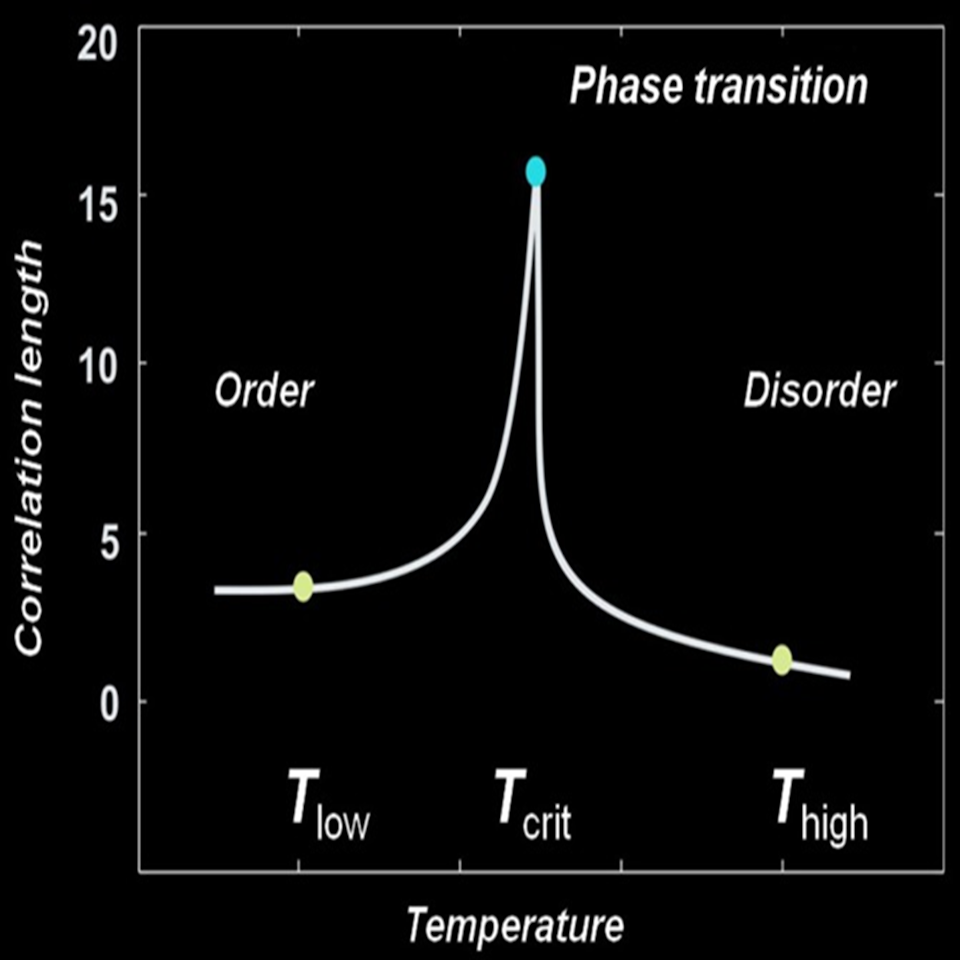 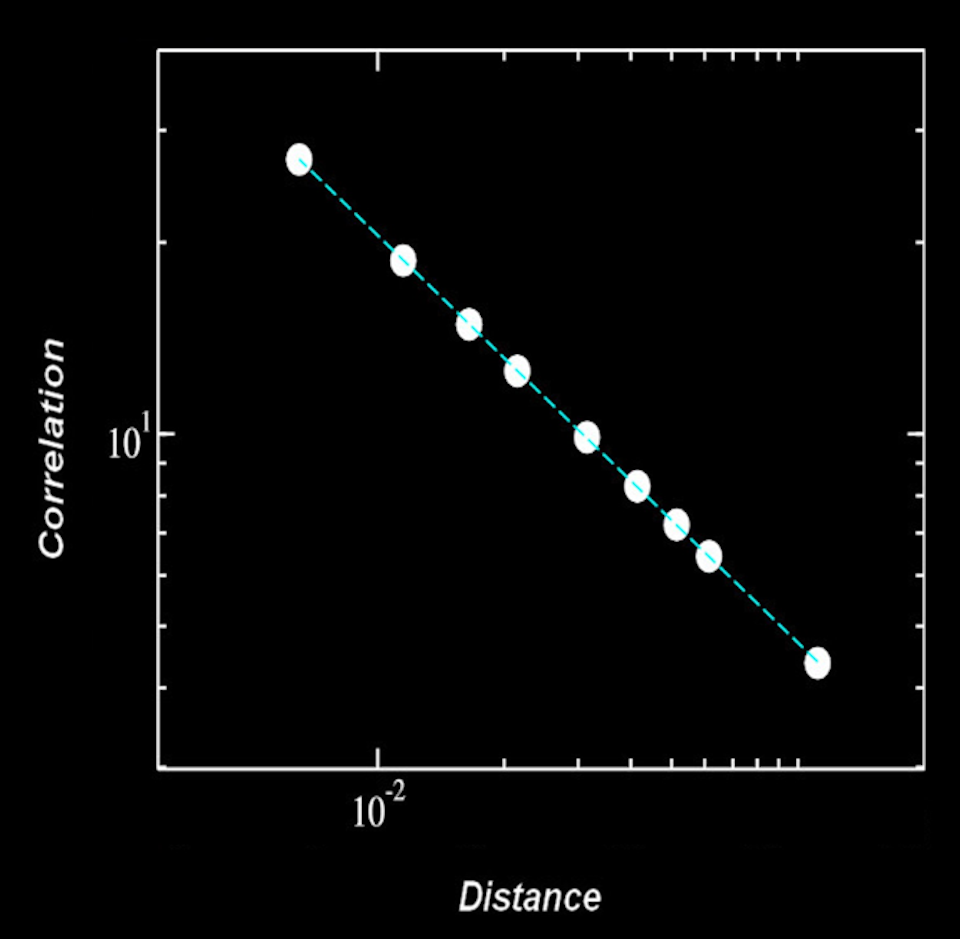 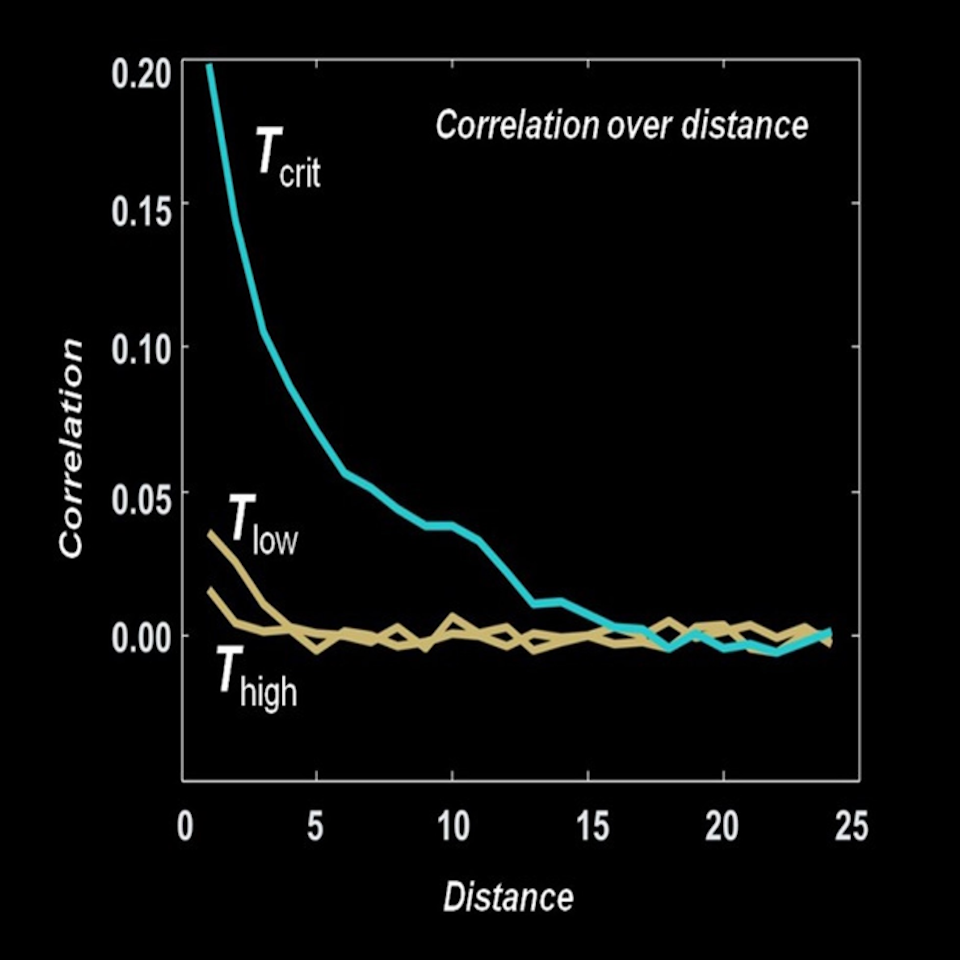

In [2]:

rnn = RecurrentNeuralNetwork(g=6, nu_ext_over_nu_thr = 2)
rnn.sim(1200)


Starting simulation at t=0. s for a duration of 1.2 s
1.2 s (100%) simulated in < 1s


In [3]:
rnn.v

array([[0.        , 0.        , 0.        , ..., 1.75628077, 1.74752128,
        1.73880548],
       [0.        , 0.        , 0.        , ..., 1.72386831, 1.81527048,
        1.80621678],
       [0.        , 0.        , 0.        , ..., 1.45894867, 1.45167214,
        1.44443189],
       ...,
       [0.        , 0.        , 0.        , ..., 1.2869646 , 1.48054584,
        1.47316158],
       [0.        , 0.        , 0.        , ..., 1.41858369, 1.41150848,
        1.40446855],
       [0.        , 0.        , 0.        , ..., 1.06626599, 1.06094797,
        1.05565647]])

In [4]:
rnn.t

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.1997e+03, 1.1998e+03,
       1.1999e+03])

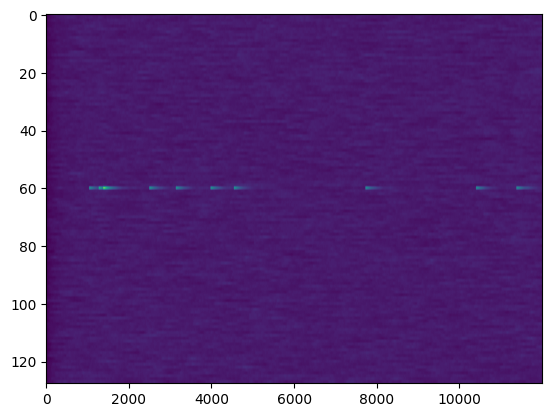

In [5]:
plt.imshow(rnn.v, aspect='auto')

# References
Beggs, J. M., & Plenz, D. (2003). Neuronal avalanches in neocortical circuits. Journal of neuroscience, 23(35), 11167-11177.

Kanders, K., Lorimer, T., & Stoop, R. (2017). Avalanche and edge-of-chaos criticality do not necessarily co-occur in neural networks. Chaos: An Interdisciplinary Journal of Nonlinear Science, 27(4).

Holcman, D., & Tsodyks, M. (2006). The emergence of up and down states in cortical networks. PLoS computational biology, 2(3), e23.
